In [23]:

import matplotlib.pyplot as plt
import np as np
import numpy as np
import pandas as pd
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, RFE, SelectPercentile
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from yellowbrick.cluster import silhouette_visualizer

!pip install numpy scipy scikit-learn matplotlib pandas
from sklearn.model_selection import GridSearchCV, train_test_split


You should consider upgrading via the '/Users/engineer/workspace/cse590-machine-learning/venv/bin/python -m pip install --upgrade pip' command.


In [42]:
X_default = pd.read_csv("../dataset/extracted_features.csv").values
y = pd.read_csv("../dataset/labels.csv").values
# images = pd.read_csv("../dataset/raw_images.csv").values
X_train_default, X_test_default, y_train, y_test = train_test_split(
    X_default, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)
y_train = y_train.ravel()

index_for_removal = np.array(
    [
        0, 10, 14, 17, 25, 26, 35, 39, 49, 59, 62,
    ]
)
X_zero_variance = np.delete(X_default, index_for_removal, 1)
X_train_zero_variance = np.delete(X_train_default, index_for_removal, 1)
X_test_zero_variance = np.delete(X_test_default, index_for_removal, 1)

select_univariate = SelectPercentile(percentile=90)
select_univariate.fit(X_zero_variance, y)
X_univariate = select_univariate.transform(X_zero_variance)
# X_train_univariate = select_univariate.transform(X_train_zero_variance)
# X_test_univariate = select_univariate.transform(X_test_zero_variance)

rf = RandomForestClassifier(
    n_estimators=200,
    max_features=3,
).fit(X_default, y)

select_sfm = SelectFromModel(
    rf,
    threshold='0.1*mean',
)
select_sfm.fit(X_univariate, y)
X_sfm = select_sfm.transform(X_univariate)
# X_test_from_model = select_sfm.transform(X_test_univariate)

select_rfe = RFE(
    RandomForestClassifier(
        n_estimators=200, random_state=42
    ),
    n_features_to_select=40
)

select_rfe.fit(X_sfm, y)
X_rfe = select_rfe.transform(X_sfm)
# X_test_iterative = select_rfe.transform(X_test_from_model)

scaler_standard_default = StandardScaler().fit(X_train_default)
X_train_standard_default = scaler_standard_default.transform(X_train_default)
X_test_standard_default = scaler_standard_default.transform(X_test_default)

scaler_standard_variance = StandardScaler().fit(X_train_zero_variance)
X_train_standard_variance = scaler_standard_variance.transform(X_train_zero_variance)
X_test_standard_variance = scaler_standard_variance.transform(X_test_zero_variance)
#
# scaler_standard_refined = StandardScaler().fit(X_train_iterative)
# X_train_standard_refined = scaler_standard_refined.transform(X_train_iterative)
# X_test_standard_refined = scaler_standard_refined.transform(X_test_iterative)


scaler_robust_default = RobustScaler().fit(X_train_default)
X_train_robust_default = scaler_robust_default.transform(X_train_default)
X_test_robust_default = scaler_robust_default.transform(X_test_default)

scaler_robust_variance = RobustScaler().fit(X_train_zero_variance)
X_train_robust_variance = scaler_robust_variance.transform(X_train_zero_variance)
X_test_robust_variance = scaler_robust_variance.transform(X_test_zero_variance)
#
# scaler_robust_refined = RobustScaler().fit(X_train_iterative)
# X_train_robust_refined = scaler_robust_refined.transform(X_train_iterative)
# X_test_robust_refined = scaler_robust_refined.transform(X_test_iterative)

scaler_minmax_default = MinMaxScaler().fit(X_train_default)
X_train_minmax_default = scaler_minmax_default.transform(X_train_default)
X_test_minmax_default = scaler_minmax_default.transform(X_test_default)

scaler_minmax_variance = MinMaxScaler().fit(X_train_zero_variance)
X_train_minmax_variance = scaler_minmax_variance.transform(X_train_zero_variance)
X_test_minmax_variance = scaler_minmax_variance.transform(X_test_zero_variance)

scaler_minmax_refined = MinMaxScaler().fit(X_rfe)
X_minmax_refined = scaler_minmax_refined.transform(X_rfe)
# X_test_minmax_refined = scaler_minmax_refined.transform(X_test_iterative)

pca_default = PCA(n_components=56, random_state=42)
X_train_pca_default = pca_default.fit_transform(X_train_standard_default)
X_test_pca_default = pca_default.transform(X_test_standard_default)

pca_refined = PCA(n_components=37, random_state=42)
# X_train_pca_refined = pca_refined.fit_transform(X_train_standard_refined)
# X_test_pca_refined = pca_refined.transform(X_test_standard_refined)


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/w5/ldwmktd90k7_zc47_06nfmy40000gp/T/ipykernel_17402/1985102883.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/feature_s

In [25]:
def shape_parameters(n_clusters):
    return dict(n_clusters=n_clusters)


def run_grid_kmeans(hyper_parameters, X_data):
    clusterer = KMeans()
    grid_search = GridSearchCV(
        estimator=clusterer,
        param_grid=hyper_parameters,
        cv=2
    )
    grid_search.fit(X_data)

    return grid_search


def index_from_value(value_list_primary, value_list_refined):
    indices = []
    for val in value_list_refined:
        indices.append(np.where(value_list_primary == val)[0][0])
    return indices


def get_core_indices(silhouette_values, pred_labels, core):
    core_silhouettes = silhouette_values[pred_labels == core]
    core_silhouettes = np.sort(core_silhouettes)[::-1][0:5]
    return index_from_value(silhouette_values, core_silhouettes)


def get_boundary_indices(silhouette_values, pred_labels, core):
    core_silhouettes = silhouette_values[pred_labels == core]
    boundary_silhouettes = list(filter(lambda _silhouette: -.001 < _silhouette < 0.001, core_silhouettes))
    return index_from_value(silhouette_values, boundary_silhouettes)


In [4]:

kmeans_params = shape_parameters(
    n_clusters=range(2, 4)
)
grid_results = run_grid_kmeans(kmeans_params, X_default)


In [5]:
labels = grid_results.predict(X_default)
print(grid_results.best_params_)
print(grid_results.get_params())


{'n_clusters': 3}
{'cv': 2, 'error_score': nan, 'estimator__algorithm': 'auto', 'estimator__copy_x': True, 'estimator__init': 'k-means++', 'estimator__max_iter': 300, 'estimator__n_clusters': 8, 'estimator__n_init': 10, 'estimator__random_state': None, 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator': KMeans(), 'n_jobs': None, 'param_grid': {'n_clusters': range(2, 4)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 0}


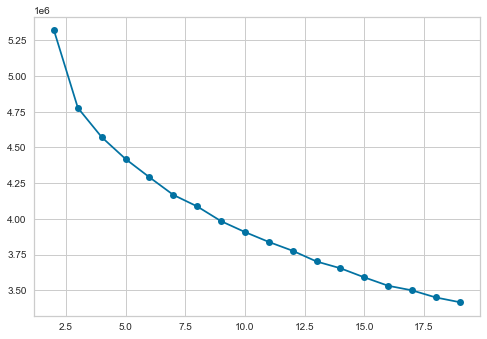

In [36]:
distortions = []
for i in range(2, 20):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(X_default)
    distortions.append(km.inertia_)

plt.plot(range(2, 20), distortions, marker='o')
plt.show()

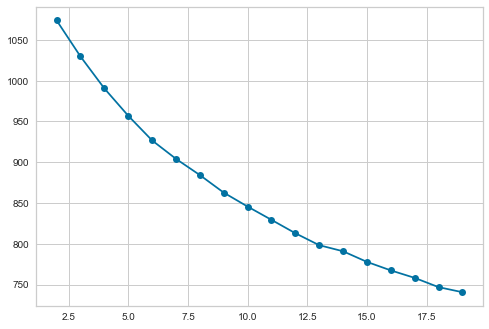

In [43]:
distortions_feature_selection = []
for i in range(2, 20):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(X_minmax_refined)
    distortions_feature_selection.append(km.inertia_)

plt.plot(range(2, 20), distortions_feature_selection, marker='o')
plt.show()

In [ ]:
distortions = []
for i in range(2, 20):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(X_default)
    distortions.append(km.inertia_)

plt.plot(range(2, 20), distortions, marker='o')
plt.show()

silhouette

In [49]:
km_final = KMeans(
    n_clusters=9,
    init='k-means++'
)
y_km = km_final.fit_predict(X_minmax_refined)


0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (9).

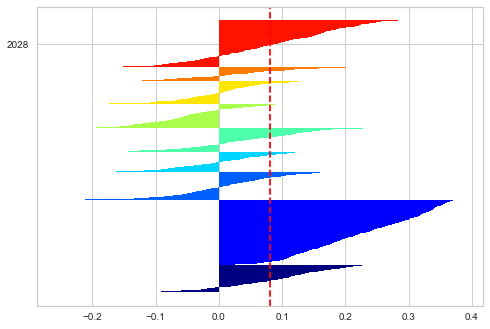

In [50]:

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_values = silhouette_samples(
    X_default,
    y_km,
    metric='euclidean'
)
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    print(i)
    print(c)
    c_silhouette_values = silhouette_values[y_km == c]
    c_silhouette_values.sort()
    y_ax_lower = y_ax_upper
    y_ax_upper += len(c_silhouette_values)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_values,
        height=1.0,
        edgecolor='none',
        color=color
    )

yticks.append((y_ax_lower + y_ax_upper) / 2.)
y_ax_lower += len(silhouette_values)
silhouette_average = np.mean(silhouette_values)
plt.axvline(silhouette_average, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.tight_layout()
plt.show()


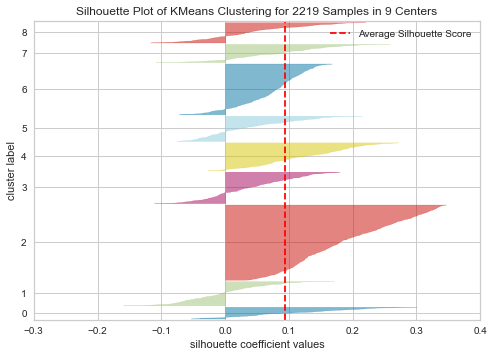

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2219 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=9, random_state=42))

In [46]:
silhouette_visualizer(KMeans(9, random_state=42), X_default, colors='yellowbrick')


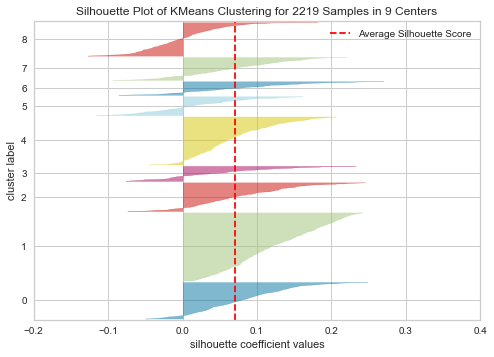

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2219 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=9, random_state=42))

In [44]:

silhouette_visualizer(KMeans(9, random_state=42), X_minmax_refined, colors='yellowbrick')


In [ ]:
silhouette_visualizer(KMeans(10, random_state=42), X_default, colors='yellowbrick')

## scaling


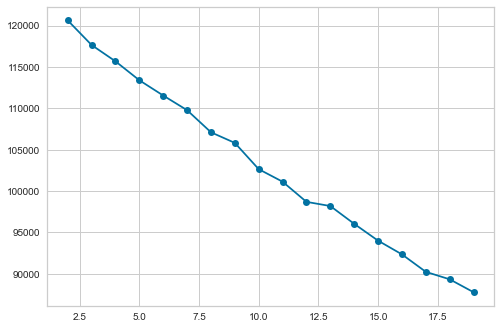

In [15]:
distortions = []
for i in range(2, 20):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(X_standard)
    distortions.append(km.inertia_)

plt.plot(range(2, 20), distortions, marker='o')
plt.show()

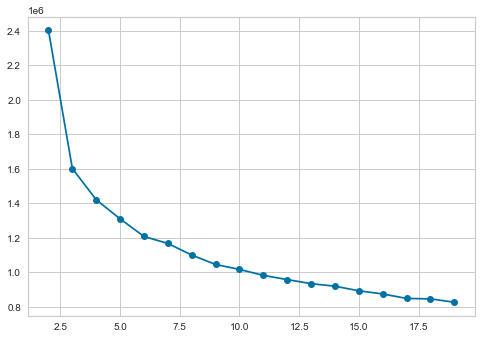

In [16]:
distortions = []
for i in range(2, 20):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(X_robust)
    distortions.append(km.inertia_)

plt.plot(range(2, 20), distortions, marker='o')
plt.show()

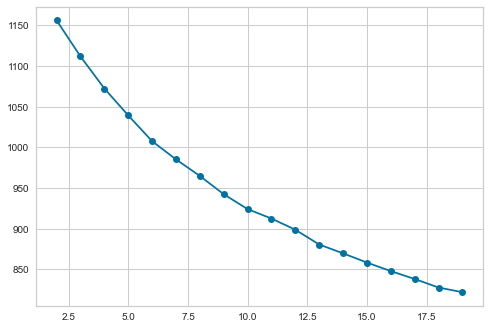

In [17]:
distortions = []
for i in range(2, 20):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(X_minmax)
    distortions.append(km.inertia_)

plt.plot(range(2, 20), distortions, marker='o')
plt.show()

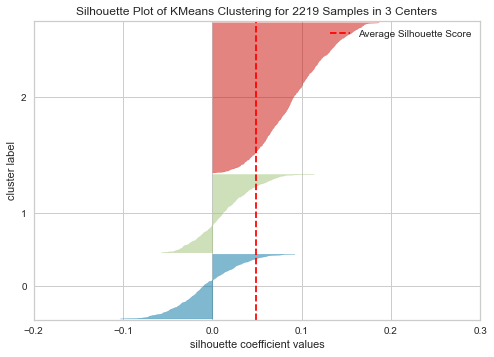

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2219 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=42))

In [18]:

silhouette_visualizer(KMeans(3, random_state=42), X_standard, colors='yellowbrick')


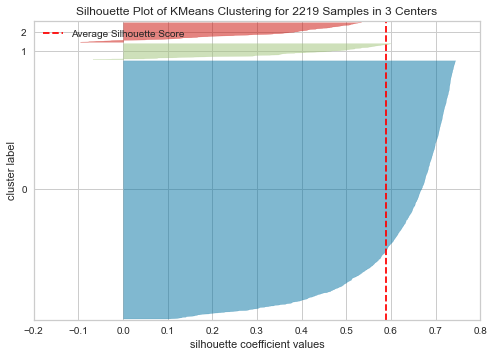

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2219 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=42))

In [19]:
silhouette_visualizer(KMeans(3, random_state=42), X_robust, colors='yellowbrick')


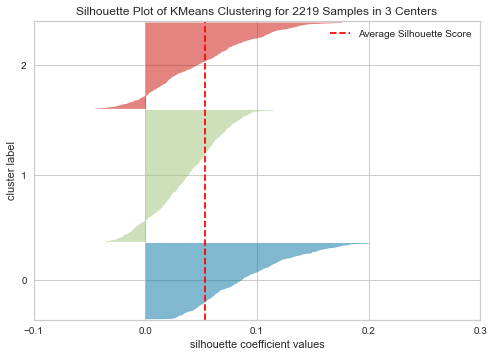

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2219 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=42))

In [20]:
silhouette_visualizer(KMeans(3, random_state=42), X_minmax, colors='yellowbrick')


In [21]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_values = silhouette_samples(
    X_default,
    y_km,
    metric='euclidean'
)

seek silhouette values at core and boundary

In [ ]:
core_silhouettes = np.sort(silhouette_values)[::-1][0:5]
print(core_silhouettes)

boundary_silhouettes = list(filter(lambda _silhouette: -.0001 < _silhouette < 0.0001, silhouette_values))
print(boundary_silhouettes)

finding the actual samples that are core and boundary

In [ ]:
core_indices = []
for silhouette in core_silhouettes:
    core_indices.append(np.where(silhouette_values == silhouette)[0][0])

print(core_indices)

boundary_indices = []
for silhouette in boundary_silhouettes:
    boundary_indices.append(np.where(silhouette_values == silhouette)[0][0])

print(boundary_indices)

In [ ]:
def display_images(image_collection, image_indices):
    fig, axes = plt.subplots(ncols=len(image_indices))
    for i in range(0, len(image_indices)):
        ax = axes[i]
        ax.imshow(image_collection[image_indices[i]].reshape(32, 32, 3))
        for spine in ax.spines.values():
            spine.set_visible(False)
        ax.tick_params(
            bottom=False, labelbottom=False,
            left=False, labelleft=False
        )
        ax.grid(False)
    plt.show()


display_images(images, core_indices)
display_images(images, boundary_indices)

In [ ]:
silhouette_values = silhouette_samples(
    X_default,
    y_km,
    metric='euclidean'
)


In [ ]:
indices_at_core_0 = get_core_indices(silhouette_values, y_km, core=0)
print(indices_at_core_0)

In [ ]:

display_images(images, indices_at_core_0)

In [ ]:
indices_at_core_1 = get_core_indices(silhouette_values, y_km, core=1)
print(indices_at_core_1)

In [ ]:

display_images(images, indices_at_core_1)

In [ ]:

indices_at_core_2 = get_core_indices(silhouette_values, y_km, core=2)
print(indices_at_core_2)

In [ ]:

display_images(images, indices_at_core_2)

In [ ]:

indices_at_core_3 = get_core_indices(silhouette_values, y_km, core=3)
print(indices_at_core_3)

In [ ]:

display_images(images, indices_at_core_3)

In [ ]:

indices_at_core_4 = get_core_indices(silhouette_values, y_km, core=4)
print(indices_at_core_4)

In [ ]:

display_images(images, indices_at_core_4)

In [ ]:
indices_at_boundary_1 = get_boundary_indices(silhouette_values=silhouette_values, pred_labels=y_km, core=1)
print(indices_at_boundary_1)

In [ ]:

display_images(images, indices_at_boundary_1[0:2])

In [26]:
print('hw')

hw
